In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("datascience-to-pandas.ipynb")

In [2]:
import pandas as pd
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## Conversion Notebook: From `datascience` library to Python's `pandas` library

Throughout this course, we have been working a lot with the `datascience` library, a library created by faculty at UC Berkeley, specifically for this course. While this library is not used outside of this course, all of the ideas and concepts behind the library and the different functions are definitely used when dealing with data science problems in the real world. One of the common libraries used in industry is called `pandas`, and is a way to structure and analyze rectangular/tabular data. Using the `datascience` library in Data 8X is a solid stepping stone to understanding `pandas` better. Throughout this notebook, we will be going over certain concepts that we saw in the `datascience` library and showing the equivalent functions that we will use in `pandas`. The syntax and function names may be different but the underlying concepts are still the same! 

Above, we `import pandas as pd`, which means that any function associated with pandas should be called using `pd.function_name()`. This tells Python that we want to use the specific `function_name` from the Pandas library. In theory, we could do `import pandas as pandas` or any other name, but it is known and commonly used to import it as `pd`. We will see some examples of this later in this notebook.

For reference:

Datascience documentation: http://data8.org/datascience/index.html

Python Reference: http://data8.org/python-reference/python-reference.html

Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/dsintro.html

### Tables and DataFrames

In `datascience`, we have something called a Table, which is a way to organize your data in a tabular format, which makes accessing rows and columns of data easier. In `pandas`, this structure is called a DataFrame. A DataFrame is the primary data structure in `pandas`. Similar to a Table, we can access different rows and columns of a DataFrame. Tables are essentially the same as DataFrames: we can do similar actions and functions with both.

In the following lines of code, we create a Table and DataFrame of data by importing and reading an external [csv file](https://en.wikipedia.org/wiki/Comma-separated_values). The Table will be called `cones_table` and the DataFrame will be called `cones_df`.

In [3]:
# datascience
cones_table = Table.read_table('cones.csv') # read the cones csv file into the notebook

In [4]:
# pandas
cones_df = pd.read_csv('cones.csv') # read the cones csv file into the notebook

In [5]:
cones_table

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [6]:
cones_df

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


We see here how to import an external csv file into our current notebook using both libraries. With `pandas` `read_csv()` function, we use `pd.read_csv()` to let Python know we want to use this particular `pandas` function.
Notice how there is an extra column of numbers in the DataFrame that results. These numbers are called the index of a DataFrame, and will be useful later in order to select different rows that we are interested in. 

In `pandas`, we have two types of objects: DataFrames and Series. Series are similar to a DataFrame except there is only one column in a Series. You can think of Series as a single column of a DataFrame. Later in this notebook, we will use Series as well as DataFrames. Series come up when we select one column of a DataFrame, apply different functions to a column, etc.

You can learn more about DataFrames and Series with this [documentation](https://pandas.pydata.org/pandas-docs/stable/dsintro.html) as well.

### Make a Table/DataFrame
If we want to create a new Table or DataFrame from scratch, we can call the respective functions and then specify the columns and the data within each column (where the data is in array/list format). Some examples from both `datascience` and `pandas` are shown below.

In [7]:
# datascience
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
) # create Table with 2 columns and 3 rows
flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [8]:
# pandas
flowers1 = pd.DataFrame(data = {'Number of petals': [8, 34, 5], 'Name': ['lotus', 'sunflower', 'rose']})
flowers1 # create DataFrame with 2 columns and 3 rows

,Number of petals,Name
0,8,lotus
1,34,sunflower
2,5,rose


### Select Columns
In both `datascience` and `pandas` we can select a column or multiple columns, based on what information we want from the data. In `datascience` we use the `select()` function, while in `pandas` we use indexing.

In [9]:
# datascience
# select one column
cones_table.select("Color")

Color
pink
light brown
dark brown
pink
dark brown
pink


In [10]:
# datascience
# select multiple columns
cones_table.select("Flavor", "Color")

Flavor,Color
strawberry,pink
chocolate,light brown
chocolate,dark brown
strawberry,pink
chocolate,dark brown
bubblegum,pink


In [11]:
# pandas
# select one column - return Series
cones_df["Color"]

0           pink
1    light brown
2     dark brown
3           pink
4     dark brown
5           pink
Name: Color, dtype: object

In [12]:
# pandas
# select one column - return DataFrame
cones_df[["Color"]]

,Color
0,pink
1,light brown
2,dark brown
3,pink
4,dark brown
5,pink


In [13]:
# pandas
# select a specific column
cones_df.Color

0           pink
1    light brown
2     dark brown
3           pink
4     dark brown
5           pink
Name: Color, dtype: object

In [14]:
# pandas
# select multiple columns
cones_df[["Flavor", "Color"]]

,Flavor,Color
0,strawberry,pink
1,chocolate,light brown
2,chocolate,dark brown
3,strawberry,pink
4,chocolate,dark brown
5,bubblegum,pink


We can also use `loc` and `iloc` to select specific columns, which we will introduce in the next section.

### Select Rows
In `datascience`, we use `take` in order to select certain rows, based on what row numbers we want to select (0 indexed). With selecting multiple rows, we use the concept of list slicing in order to select a sequence of rows, or even select multiple rows (if the numbers are in an array). 

In [15]:
# datascience 
cones_table.take(2) # select the row with an index of 2

Flavor,Color,Price
chocolate,dark brown,5.25


In [16]:
cones_table.take(np.arange(1, 3)) # select the rows with index from 1 to 3 (not 3)

Flavor,Color,Price
chocolate,light brown,4.75
chocolate,dark brown,5.25


In [17]:
cones_table.take[0, 3, 4] # select the rows with index 0, 3, 4

Flavor,Color,Price
strawberry,pink,3.55
strawberry,pink,5.25
chocolate,dark brown,5.25


In [18]:
# pandas
cones_df[0:3] # select the rows with index from 0 to 3 (not including 3)

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25


#### loc and iloc

With `pandas`, we can use `loc` and `iloc` to select certain rows or columns from a DataFrame - all at once - making it a powerful tool. `loc` gets rows or columns with particular labels from the index. `iloc` gets rows or columns at particular positions in the index (so it only takes integers). With both of these, we index using brackets and specify which rows and columns we want to select based on `[row, column]`. Note: if we have just `:` for either row or column, this means that we select all of it (based on if it is in the row or column section of the brackets). An example is shown below.

In [19]:
cones_df.loc[:,'Flavor'] # select all rows but only the column Flavor

0    strawberry
1     chocolate
2     chocolate
3    strawberry
4     chocolate
5     bubblegum
Name: Flavor, dtype: object

In [20]:
cones_df.loc[:,['Flavor', 'Color']] # select all rows but only the Flavor and Color columns

,Flavor,Color
0,strawberry,pink
1,chocolate,light brown
2,chocolate,dark brown
3,strawberry,pink
4,chocolate,dark brown
5,bubblegum,pink


In [21]:
cones_df.iloc[1:3,0:3] # select the rows with index from 1 to 3 (not including 3) and columns in the positions of 0 to 3 (not including 3) 

,Flavor,Color,Price
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25


### Rename Columns

In the `datascience` package, we can rename a column or multiple columns. We may want to do this when we update a column to make the title more specific. We also need to make sure that the new column name is not the same as any other existing columns (so we do not have two columns with the same name as this will error). We do this with the `relabeled()` function. 

In [22]:
cones_table.relabeled('Price', 'New Price') # rename the Price columns as New Price

Flavor,Color,New Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [23]:
cones_table.relabeled(['Color', 'Price'], ['Ice Cream Color', 'New Price']) # rename two columns: Color as Ice Cream Color and Price as New Price

Flavor,Ice Cream Color,New Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In `pandas` we can use a similar function called `rename()`.

In [24]:
cones_df.rename(columns={'Flavor': 'New Flavor'}) # rename the Flavor column as New Flavor

,New Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [25]:
cones_df.rename(columns={'Flavor': 'New Flavor', 'Color': 'New Color'}) # rename Flavor as New Flavor and Color as New Color

,New Flavor,New Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


### Where/Filtering

In `datascience` there is a function called `where` which creates a copy of a table with only the rows that match some condition. To filter out a DataFrame by its contents in `pandas`, we need to use boolean (`True` or `False`) expressions in order to select the rows we want to keep.

In [26]:
# datascience
cones_table.where("Price", are.above(4)) # select/filter rows so the Price is above 4

Flavor,Color,Price
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


We want to keep the rows that have a price that is greater than 4. We can first create a boolean array, which will assign a `True` or `False` value to each row based on if it satisfies the condition we give it. We can then index this array into our original array and only the values that are `True` will be returned in a DataFrame.


In [27]:
# pandas
boolean_array = cones_df["Price"] > 4 # create a boolean array saying if the Price is greater than 4
boolean_array

0    False
1     True
2     True
3     True
4     True
5     True
Name: Price, dtype: bool

In [29]:
cones_df[boolean_array] # apply boolean array to DataFrame and filter the rows

,Flavor,Color,Price
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


We can also do this all in one step as shown below.

In [30]:
cones_df[cones_df["Price"] > 4] # filter the DataFrame based on Price greater than 4

,Flavor,Color,Price
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


Sometimes we want to filter by multiple different conditions. In `pandas` we can do this using parentheses and a symbol indicating if we want both conditions to be satisfied (and) or at least one to be satisfied (or). The format is: 

`df[(condition1) & (condition2)]`

or 

`df[(condition1) | (condition2)]`

Note: `&` is different from `and` 
also `|` is different from `or`.

In [31]:
cones_df[(cones_df["Price"] > 4) & (cones_df["Price"] < 5)] # filter the DataFrame based on Price greater than 4 and less than 5

,Flavor,Color,Price
1,chocolate,light brown,4.75
5,bubblegum,pink,4.75


### Sort, Group, Pivot
#### Sort
We can sort values similarly in Tables and DataFrames - using a function and what column we want to sort by.

In [32]:
# datascience
cones_table.sort('Price') # sort the table by Price column

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
bubblegum,pink,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25


In [33]:
# pandas
cones_df.sort_values('Price') # sort DataFrame by Price column

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
5,bubblegum,pink,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25


If we want to specify whether we sort in ascending order or descending order. In `datascience` we can do this with the `descending` parameter, and sending it equal to `True` or `False`. In `pandas` we can use the `ascending` parameter and set this equal to `True` or `False`. By default, the column sorts in ascending order.

#### Group 
In both `datascience` and `pandas` we can use group functions that allow us to group records of our data into buckets. You can think of group by as splitting the dataset data into buckets. Then you can call "aggregate" functions (`mean`, `sum`, `max`, `min`, etc) on these buckets to find these values per bucket (which can lead to interesting analysis)!

Let's say that we want to group by flavor of ice cream and see what the total sum is.

In [34]:
# datascience
cones_table.select(['Flavor', 'Price']).group('Flavor', collect=sum) # select the Flavor and Price columns and then group by Flavor and find the sum price per flavor

Flavor,Price sum
bubblegum,4.75
chocolate,15.25
strawberry,8.8


In [35]:
# pandas
cones_df[['Flavor', 'Price']].groupby('Flavor').sum() # select the Flavor and Price columns and then group by Flavor and find the sum price per flavor

,Price
Flavor,
bubblegum,4.75
chocolate,15.25
strawberry,8.80


#### Pivot
We can create pivot tables in both `datascience` and `pandas` using different functions and specifying columns, index, values, and the collect/aggregate function acting on the values. 

In [36]:
# datascience
cones_table.pivot(columns = 'Flavor', rows = 'Color', values = 'Price', collect=sum) # create a pivot table with Flavors and Color and sum prices for corresponding entries

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In [37]:
# pandas
cones_df.pivot_table(values='Price', index=['Color'], columns=['Flavor'], aggfunc=sum) # create a pivot table with Flavors and Color and sum prices for corresponding entries

Flavor,bubblegum,chocolate,strawberry
Color,,,
dark brown,NaN,10.50,NaN
light brown,NaN,4.75,NaN
pink,4.75,NaN,8.8


Note: We have `NaN` as values in our above table because `pandas` cannot find appropriate values for those specific combinations of rows and columns. If we want to replace these values with 0, we can use `fillna(0)` on the resulting pivot table. 

Don't be alarmed by these `NaN` values! This is something to note about real data, often times the data is not cleaned already and null values are very common. They may even be important in your exploration of the data, the number of null values you have and where they occur could be important!

### Visualizing Data
For the purpose of representing and showing how to plot different visualizations, we will now create another Table/DataFrame.

In [38]:
normal_data_table = Table().with_columns(['data1', np.random.normal(loc = 1, scale = 2, size = 100), 'data2', np.random.normal(loc = 4, scale = 3, size = 100)])
normal_data_table

data1,data2
2.8109,5.34292
1.61053,1.07158
1.04428,3.89933
3.85106,9.18796
3.35813,6.33044
0.928052,2.84554
0.773693,3.38974
2.03763,5.22876
-5.05478,2.31603
0.184031,0.441909


In [39]:
normal_data_df = pd.DataFrame(data = {'data1': np.random.normal(loc = 1, scale = 2, size = 100), 'data2': np.random.normal(loc = 4, scale = 3, size = 100)})
normal_data_df.head(10)

,data1,data2
0,1.972181,3.922828
1,0.106359,6.838265
2,0.095734,6.963386
3,-3.225698,5.644812
4,0.150170,7.795730
5,-0.161851,0.335637
6,0.690945,8.892171
7,2.421973,5.434207
8,2.096171,7.056164
9,-0.557418,4.154251


#### Histograms
`datascience` histograms: http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html

`pandas` histograms: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html

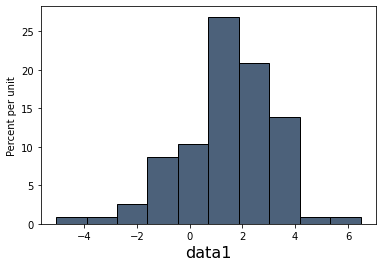

In [40]:
# datascience
new = normal_data_table.select('data1') # create histogram of data1
new.hist()

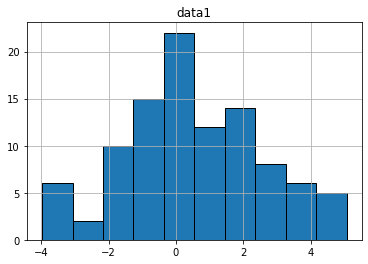

In [41]:
# pandas
new = normal_data_df[["data1"]] # create histogram of data1
new.hist();

#### Scatterplots
`datascience` scatterplots: http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html

`pandas` scatterplots: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html

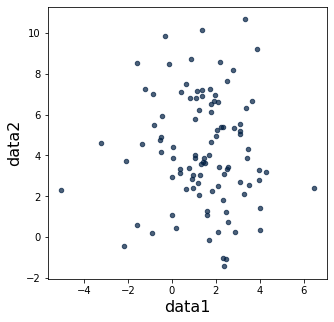

In [42]:
# datascience
normal_data_table.scatter('data1') # create scatterplot of data1 vs data2

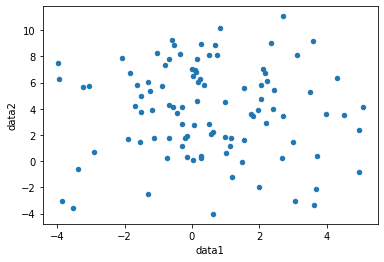

In [43]:
# pandas
normal_data_df.plot.scatter(x = 'data1', y = 'data2'); # create scatterplot of data1 vs data2

#### Barplots
`datascience` barplots: http://data8.org/datascience/_autosummary/datascience.tables.Table.barh.html

`pandas` barplots: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

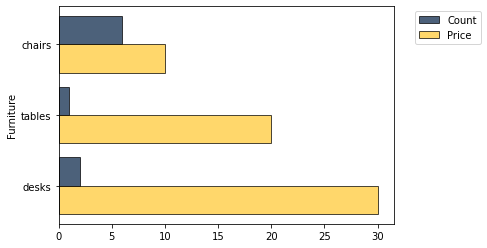

In [44]:
# datascience
t = Table().with_columns('Furniture', make_array('chairs', 'tables', 'desks'), 'Count', make_array(6, 1, 2), 'Price', make_array(10, 20, 30)) # barplot of count and price of different furnitures
t.barh('Furniture')

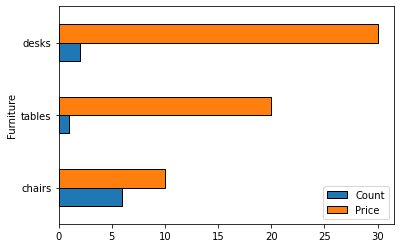

In [45]:
# pandas
df = pd.DataFrame(data = {'Furniture': ['chairs', 'tables', 'desks'], 'Count': [6, 1, 2], 'Price': [10, 20, 30]})
df.plot.barh('Furniture'); # barplot of count and price of different furnitures

For all of the plots above, there are many different parameters you can play around with (color, size, orientation, figure size, axis labels, title, etc). Above are the basic implementations of these graphs but we recommend looking through the documentation and seeing how you can change different aspects of it. Try using the DataFrame given and plotting a different graph!

### Export to CSV

When we want to convert a Table to a csv file, we first need to convert it to a DataFrame and then to a csv file. In `pandas`, we can get rid of this intermediate step because we already have a DataFrame!

In [46]:
cones_table.to_df().to_csv('cones_datascience.csv', index = False)

In [47]:
cones_df.to_csv('cones_dataframe.csv', index = False)

### Calculate the number of columns
In `datascience`, calculating the number of columns (or rows) requires a simple call using our Table, either `num_columns` or `num_rows`. With `pandas`, there are two ways to get the number of columns and rows. The `len` function can be used on a part of the DataFrame, or the `shape` function can be used. The `shape` function returns both the number of rows and the number of columns so based on what we want, we will have to select it using indexing. 

In [48]:
# datascience
cones_table.num_columns

3

In [49]:
# pandas
len(cones_df.columns) # find the length of the list of column names
# or
cones_df.shape[1] # select the column part of shape

3

### Calculate the number of rows

In [50]:
# datascience
cones_table.num_rows

6

In [51]:
# pandas
len(cones_df) # number of rows in the DataFrame
# or
cones_df.shape[0] # select the row part of shape

6

### Apply
In both libraries, we have a function called `apply`, which we use to apply a function on a certain column and all its elements. Note: in `pandas`, apply works on a Series (since this is essentially a single column of a DataFrame).

In [52]:
# datascience
cones_table.apply(round, "Price") # apply the round function to the column Price

array([4, 5, 5, 5, 5, 5])

In [53]:
# pandas
cones_df["Price"].apply(round, "Price") # apply the round function to the column Price

0    4
1    5
2    5
3    5
4    5
5    5
Name: Price, dtype: int64

Above we see that we get the rounded up prices returned to us. If we wanted to change the column in the original Table/DataFrame, we would set the expression above equal to the column/series so that the change is made and saved in the original.

For example:

`
cones_table = cones_table.apply(round, "Price")
`

or

`
cones_df["Price"] = cones_df["Price"].apply(round, "Price")
`

### Joining
Joins are useful when we want to combine two or more tables together, so we can do analysis on all of the tables. In `datascience`, we can use `join` and in `pandas` we can use `merge`. With both we need the information of the two tables and how we are joining on them (the appropriate columns). 

In [54]:
# datascience
table = Table().with_columns('first', make_array('i', 'c', 'c', 'a'), 'second', make_array('a', 'b', 'b', 'j'), 'third', make_array('c', 'd', 'e', 'f'))
table2 = Table().with_columns( 'another', make_array('i', 'a', 'a', 'a'), 'fourth', make_array('a', 'b', 'b', 'j'), 'fifth', make_array('c', 'd', 'e', 'f'))
print(table)
print()
print(table2)
table.join('first', table2, 'fourth') # join table and table 2 together so columns first and fourth match values

first | second | third
i     | a      | c
c     | b      | d
c     | b      | e
a     | j      | f

another | fourth | fifth
i       | a      | c
a       | b      | d
a       | b      | e
a       | j      | f


first,second,third,another,fifth
a,j,f,i,c


In the above code block, we create two different tables. When we call the `join()` function on these two tables, we take the cross product of the rows of both tables (every combination of rows that could happen between both tables) and then filter this out based on the columns we specify that need to be the same. In this case we have row `first` from the first table and row `fourth` from the second table, therefore we can only keep rows that have a value in `first` from the first table and `fourth` from the second table that are the same. In our example, the similar value is `first` and `fourth` is the value `a` (we see it in the last row of the `first` column and the first row of the `fourth` column). We then look at the values in these two rows and create a table with the values. Similarly, we can replicate this in `pandas`:

In [55]:
df = pd.DataFrame(data = {'first': ['i', 'c', 'c', 'a'], 'second': ['a', 'b', 'b', 'j'], 'third': ['c', 'd', 'e', 'f']})
df2 = pd.DataFrame(data = {'another': ['i', 'a', 'a', 'a'], 'fourth': ['a', 'b', 'b', 'j'], 'fifth': ['c', 'd', 'e', 'f']})
print(df)
print()
print(df2)
df.merge(df2, left_on = 'first', right_on = 'fourth', how = "inner") # merge df and df2 using an inner join using columns first and fourth

  first second third
0     i      a     c
1     c      b     d
2     c      b     e
3     a      j     f

  another fourth fifth
0       i      a     c
1       a      b     d
2       a      b     e
3       a      j     f


,first,second,third,another,fourth,fifth
0,a,j,f,i,a,c


In the `pandas` code above, we have an extra argument that we need to specify: how. There are many types of joins that we can do with data. In `datascience`, the only option we can do is an inner join, but in `pandas`, we have the option to do inner, left, right, outer joins. For more information about these types of joins, check out this page: http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.DataFrame.merge.html

### Reading `pandas` Documentation
There are many more functions and methods you can call with `pandas` to do more cool things with Series and DataFrames. One way to learn more about this is by looking through the `pandas` documentation. The documentation has all the different functions associated with `pandas`, and descriptions about what they do, how you use them, and some examples. 

Some tips for reading through the documentation:
* For various functions there are LOTS of different parameters that you can call, usually there are only a few that are important (usually related to the data you are working with and specifying how to run the functions). There are some parameters that are optional and you do not have to specify (automatically Pandas will use default settings for these functions). For example, for joins, an inner join is the default setting but if needed, you can say you want to do an outer join etc.
* Another useful parameter is the `inplace` parameter. When set to true, the data is renamed/the function is run in place (a copy of the new data with the function applied is NOT created)
* For quick lookup for a specific function: in Jupyter you can put your cursor on a Pandas function and press Shift + Tab in order to see part of the documentation. Based on how many times you press the Tab, it will show you the header of the function (how you would call it and parameters) and a description of the function overall and a description of the parameters.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)